# <font size=7> <font color = darkblue>Linear Regression

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.titlepad']= 8
plt.rcParams['axes.titlesize']= 'medium'
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['axes.facecolor'] = 'white'
np.set_printoptions(suppress=True)

---

## <font size=6> Supervised Machine Learning: <font color='darkblue'>Regression <font color='black'> Or  <font color=darkgreen>Classification

## \begin{equation*}  Y = Function(X)   \end{equation*}   
## \begin{equation*}  Y = F(X_1, X_2, X_3........  X_n)   \end{equation*}

---

## Simple Linear Regression

# \begin{equation*} y = mx + c \end{equation*} 



## Multi Linear Regression

## $$ 
\begin{equation*}y = m_1x_1 + m_2x_2 + m_3x_3 +.... + m_nx_n + c \end{equation*}
$$

### In real life machine learning problems data is complex, requiring several features: Multi Linear Regression

## \begin{equation*}y =   m_1x_1 + m_2x_2 + m_3x_3 +.... + m_nx_n + c + error \end{equation*}

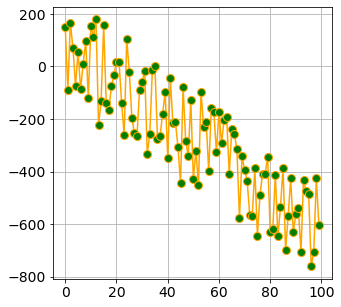

In [3]:
x1 = np.arange(0, 100)
x2 = x1 + np.random.randint(-20, 20, 100)
x3 = np.random.randint(80, 110, 100)
c = 20
error = np.random.randint(-10, 10, 100)

y_actual = 3*x1 - 10*x2 + 0.5*x3 + c + error
# y_pred= -30*x1 + 10*x2 + 0.5*x3 + c

plt.plot(x1, y_actual, c='orange', marker = 'o', markerfacecolor = 'g', markersize=8)
# plt.plot(x1, y_pred, c='red')
plt.grid(True)
plt.show()

### Lets check for multicollinearity

In [4]:
np.corrcoef(x1, x2)

array([[1.        , 0.92288607],
       [0.92288607, 1.        ]])

----
---

## \begin{equation*}  Cost Function  =  Min\ \frac{\sum (Yactual_i - Ypred_i)^2}{N} \end{equation*}


### <font color = darkblue>How do we find the line with the Minimum value for the Loss function?
### In the above equation, the value of Y Actual and N is fixed, we can only change Ypred, which is mx + c. That means we have to look for the value of m & c which will give us the lowest value of the Loss function.   

###  for Simple Linear Equation...__
## \begin{equation*}  Cost = F(m, c)   \end{equation*}   
### __For Multi Linear Equation...__
## \begin{equation*}  Cost = F(m1, m2, m3, c)   \end{equation*}   

* ## Option 1:  Mathematical Solution for Multi Linear Regression
    * ### Normal Equation
    * ### Slow for large datasets
 
* ## Option 2: Gradient Descent Approach for Multi Linear Regression
    * ### Feasible for large datasets
    * ### This approach involves trying different lines and choosing the best one using Gradient Descent

## Preparing Dataset for ML

### Step 1: Inspect the Dataset

In [5]:
bos=pd.read_csv('BostonHousing.csv')

In [6]:
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


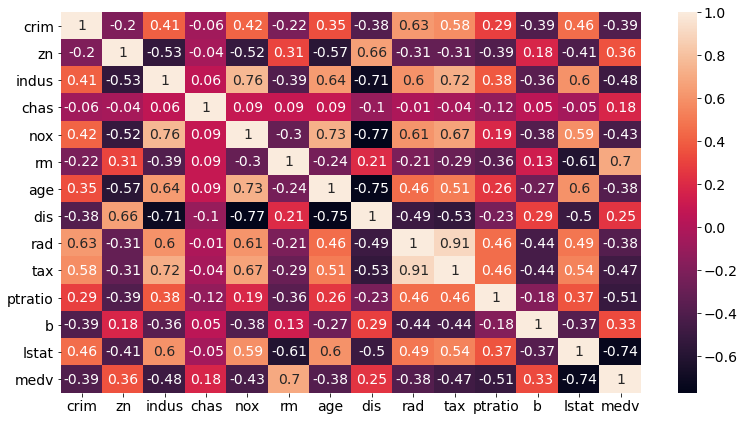

In [8]:
plt.figure(figsize=(13, 7))
sns.heatmap(np.round(bos.corr(), 2), annot=True)
plt.show()

### Step 2: Seperating Target & Features + Dividing the dataset

__Let's seperate Predictors / Factors / Independent Variables / Features FROM Target Variable / Dependent variable/ Response variable__

In [9]:
X=bos.drop('medv', axis=1)
y=bos['medv']

In [10]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
X_train.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,395.04,12.60
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91


---

## Running Linear regression model

In [14]:
from sklearn.linear_model import LinearRegression

## __Step 1: Instantiate a model__

In [15]:
lr = LinearRegression()

## __Step 2. Fit the model__

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
np.round(lr.coef_, 2)

array([ -0.15,   0.07,  -0.02,   1.62, -15.3 ,   3.35,   0.01,  -1.55,
         0.3 ,  -0.01,  -0.81,   0.01,  -0.54])

## y = m1x1 + m2x2 +...... mnxn + c

In [18]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [19]:
lr.intercept_

34.24483703390655

### Same thing with statsmodel

In [20]:
import statsmodels.api as sm

In [21]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train_sm).fit()

In [22]:
print(model.params)

const      34.244837
crim       -0.153776
zn          0.065016
indus      -0.024260
chas        1.622033
nox       -15.299931
rm          3.351967
age         0.011326
dis        -1.548109
rad         0.302642
tax        -0.012232
ptratio    -0.811539
b           0.012950
lstat      -0.544862
dtype: float64


In [23]:
X_test.iloc[[1]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
193,0.02187,60.0,2.93,0,0.401,6.8,9.9,6.2196,1,265,15.6,393.37,5.03


In [24]:
np.round(lr.coef_, 2)

array([ -0.15,   0.07,  -0.02,   1.62, -15.3 ,   3.35,   0.01,  -1.55,
         0.3 ,  -0.01,  -0.81,   0.01,  -0.54])

In [25]:
lr.intercept_ + X_test.iloc[1].dot(lr.coef_)

31.96785487044971

## __Step 3: Predict the values based on model (optional)__

In [26]:
lr.predict(X_test)

array([31.4243217 , 31.96785487, 30.93785448, 22.34313349, 18.83846235,
       16.20617519, 35.92908162, 14.74157477, 25.07700756, 37.13230282,
       21.47652971, 30.92661826, 28.07823424, 34.02599249, 33.7778476 ,
       40.63701192, 24.25899783, 23.43019291, 25.547906  , 21.34469147,
       32.65467539, 17.80506124, 25.46149722, 25.0207691 , 32.51742137,
       20.51357936, 19.47165255, 16.87107974, 38.44316206,  0.3888111 ,
       32.39559257, 32.15518102, 26.05305015, 23.82049084, 20.56494632,
       19.66990981,  3.53212643, 35.21058387, 27.03280773, 27.67994129,
       34.36642896, 29.82003002, 18.31717228, 31.55109654, 17.93465111,
       28.4618882 , 19.39950216, 21.60782793, 38.10391926, 16.45101411,
       24.51003632, 19.57072199, 24.53359986, 34.34589029, 26.74381857,
       34.86340026, 21.02859444, 19.77400901, 18.68461884, 24.64911818,
       19.89923131, 23.52871967, 39.56690084, 42.81848202, 30.38116596,
       16.96889789, 23.83550068,  3.18952008, 31.52469303, 28.66

## __Step 4: Check the score (Quality of the Model)__

In [27]:
print('Test Score: ', lr.score(X_test, Y_test))
print('Train Score: ', lr.score(X_train,Y_train))

Test Score:  0.6996255772983108
Train Score:  0.7495400632086622


In [ ]:
# lr.score?

# Evaluating a Regression Model:
### \begin{equation*} Mean\ Squared\ Error (MSE / OLS)  = \frac{\sum (Yactual_i - Ypred_i)^2}{N} \end{equation*}
### \begin{equation*} Mean\ Absolute\ Error (MAE)  = \frac{\sum |(Yactual_i - Ypred_i)|}{N} \end{equation*}
### \begin{equation*} Root\ Mean\ Squared\ Error (RMSE)  = \sqrt\frac{\sum (Yactual_i - Ypred_i)^2}{N} \end{equation*}
### \begin{equation*} RSquare  = 1-  \frac{\sum (Yactual_i - Ypred_i)^2}{\sum (Yactual_i - Yactual_\mu)^2}  = 1 - FVU\end{equation*} 
* *RSquare takes a value of 1 for perfect fit and can also take negative values, if it is worse than a constant prediction*

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr.predict(X_test)
print('MSE: ', mean_squared_error(Y_test, y_pred))
print('RMSE: ', mean_squared_error(Y_test, y_pred)**0.5)
print('MAE: ', mean_absolute_error(Y_test, y_pred))
print('R_Square: ', r2_score(Y_test, y_pred))

MSE:  29.326596526123318
RMSE:  5.4154036346447265
MAE:  3.7071271372718173
R_Square:  0.6996255772983108


In [29]:
Y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
56     24.7
37     21.0
66     19.4
427    10.9
12     21.7
Name: medv, Length: 152, dtype: float64

---

### Lets try Standard Scaled Values now
* #### Helps in getting better and faster results. Scores will either become better or remain the same.
* #### Coefficients can be interpreted in terms of importance

In [30]:
from sklearn.preprocessing import StandardScaler # Gives z scores. 

### \begin{equation*} X_{Zscores}  = \frac{X_i- X_{\mu}}{X_{Std}} \end{equation*}

In [ ]:
# StandardScaler?

In [31]:
SS= StandardScaler()

In [32]:
Xs_train = SS.fit(X_train)
Xs_train = SS.transform(X_train)
Xs_test = SS.transform(X_test)

In [33]:
Xs_train

array([[-0.41649788, -0.47088369, -1.24221453, ..., -0.26207053,
         0.4497093 , -1.24456651],
       [-0.38958849, -0.47088369,  1.49151829, ...,  1.22452684,
         0.43002269, -0.05240584],
       [ 1.41271862, -0.47088369,  0.94621053, ...,  0.75996516,
        -0.05219357,  1.69675957],
       ...,
       [-0.1393715 , -0.47088369,  0.94621053, ...,  0.75996516,
         0.17272073,  0.05274301],
       [-0.4105828 , -0.47088369,  2.03250962, ...,  0.24894732,
         0.32396898,  0.26161979],
       [-0.33784409,  0.3618518 , -1.08682341, ..., -2.58487891,
         0.40208039, -0.35790589]])

In [34]:
Xs_train[:5, 2]

array([-1.24221453,  1.49151829,  0.94621053, -1.02639352, -1.01200545])

In [35]:
np.mean(Xs_train[:, 3])

2.007182869378814e-17

In [36]:
np.std(Xs_train[:, 0])

0.9999999999999998

In [37]:
lr.fit(Xs_train, Y_train)

LinearRegression()

In [38]:
print('Test Score: ', lr.score(Xs_test,Y_test))
print('Train Score: ', lr.score(Xs_train,Y_train))

Test Score:  0.6996255772983113
Train Score:  0.7495400632086622


In [39]:
lr.coef_

array([-1.252809  ,  1.56150248, -0.16861008,  0.37449384, -1.7776332 ,
        2.23783886,  0.3168073 , -3.27712377,  2.69471035, -2.10285702,
       -1.74689193,  1.22356691, -3.83454078])

In [40]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

---

## Regularised Linear Regression:
### The Loss/Cost function is changed to one of the below forms:

### \begin{equation*} Lasso\ Regression\ (L_1\ Penalty)  =  \frac{1}{2N} \times \sum (Yactual_i - Ypred_i)^2 + \alpha\sum |Coeff_i|  \end{equation*}
### \begin{equation*} Ridge\ Regression\ (L_2\ Penalty)  = \sum (Yactual_i - Ypred_i)^2 + \alpha\sum (Coeff_i)^2  \end{equation*}
### \begin{equation*} ElasticNet  =  \frac{1}{2N} \times \sum (Yactual_i - Ypred_i)^2  +   \alpha \times l1_{ratio} \sum |Coeff_i|  + 0.5 \times \alpha \times (1-l1_{ratio} ) \sum (Coeff_i)^2 \end{equation*}


* LASSO (Least Absolute Shrinkage Selector Operator)

In [41]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [42]:
las = Lasso(alpha=1)
las.fit(Xs_train,Y_train)
print('Test Score: ', las.score(Xs_test,Y_test))
print('Train Score: ', las.score(Xs_train,Y_train))

Test Score:  0.6450731904165208
Train Score:  0.6636758056200329


In [43]:
las = Lasso(alpha= 0.1)
las.fit(Xs_train,Y_train)
print('Test Score: ', las.score(Xs_test,Y_test))
print('Train Score: ', las.score(Xs_train,Y_train))

Test Score:  0.7005857824127906
Train Score:  0.7432493009300147


In [44]:
las.coef_

array([-0.94238549,  1.1662589 , -0.2007973 ,  0.35238236, -1.1831578 ,
        2.45393039,  0.        , -2.61751631,  1.21934771, -0.91324394,
       -1.59201034,  1.14071801, -3.73929406])

In [45]:
lr.coef_

array([-1.252809  ,  1.56150248, -0.16861008,  0.37449384, -1.7776332 ,
        2.23783886,  0.3168073 , -3.27712377,  2.69471035, -2.10285702,
       -1.74689193,  1.22356691, -3.83454078])

In [46]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [47]:
rid= Ridge(alpha = 3)
rid.fit(Xs_train,Y_train)
print('Test Score: ', rid.score(Xs_test,Y_test))
print('Train Score: ', rid.score(Xs_train,Y_train))

Test Score:  0.7001762570962724
Train Score:  0.7493200790466319


In [48]:
np.round(rid.coef_, 2)

array([-1.21,  1.49, -0.23,  0.39, -1.67,  2.28,  0.28, -3.15,  2.42,
       -1.86, -1.72,  1.22, -3.78])

In [49]:
ela= ElasticNet(alpha = 0.025, l1_ratio= 0.5)
ela.fit(Xs_train,Y_train)
print('Test Score: ', ela.score(Xs_test, Y_test))
print('Train Score: ', ela.score(Xs_train, Y_train))

Test Score:  0.700837573945515
Train Score:  0.7486538725095075


In [50]:
np.round(ela.coef_, 2)

array([-1.16,  1.41, -0.24,  0.39, -1.55,  2.33,  0.21, -3.02,  2.15,
       -1.64, -1.69,  1.21, -3.73])

In [129]:
# ela.predict(Xs_test)